The purpose of this project was to test our skills in assessing the quality of FASTQ data in its various aspects. In each part, we became familiar with different quality control metrics and methods used to evaluate sequencing data

In [1]:
!pip install -r requirements.txt

In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns
from gzip import open as gzopen
import matplotlib.patches as patches
from Bio import SeqIO
import statistics as stats




 Read the FASTQ File

In [2]:


def read_fastq(file_path):
    return list(SeqIO.parse(file_path, "fastq"))

reads = read_fastq("Module 1 Project\mixed_quality.fastq")
print(f"Total reads: {len(reads)}")


Total reads: 1000


 Quality Score Distribution

Average Phred Quality Score: 29.50


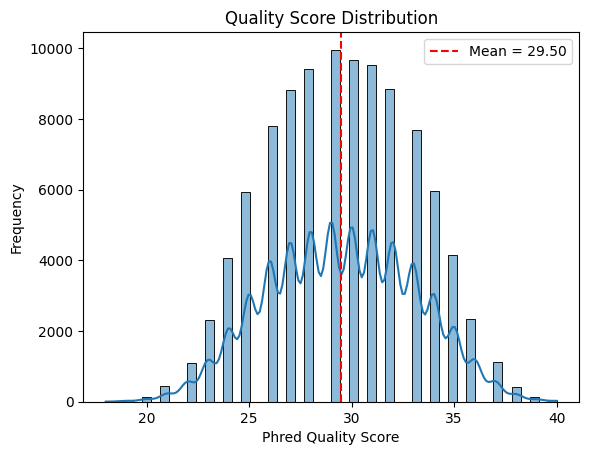

In [3]:


def plot_quality_distribution(reads):
    all_scores = []
    for record in reads:
        all_scores.extend(record.letter_annotations["phred_quality"])
    
    mean_quality = np.mean(all_scores)
    print(f"Average Phred Quality Score: {mean_quality:.2f}")
    
    sns.histplot(all_scores, bins=50, kde=True)
    plt.title("Quality Score Distribution")
    plt.xlabel("Phred Quality Score")
    plt.ylabel("Frequency")
    plt.axvline(mean_quality, color='red', linestyle='--', label=f'Mean = {mean_quality:.2f}')
    plt.legend()
    plt.show()

plot_quality_distribution(reads)


Average Phred Quality Score per Read: 29.50


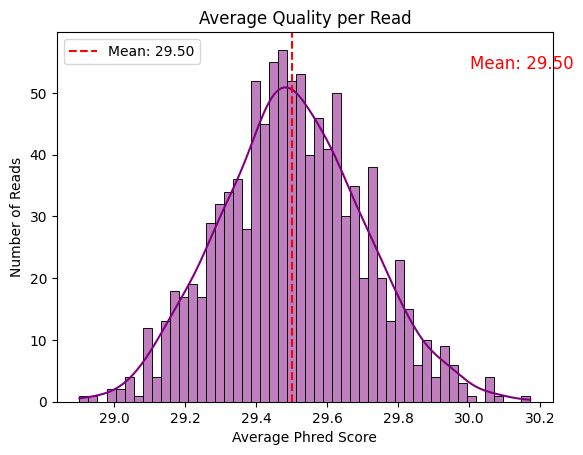

In [4]:


def plot_read_average_quality(reads):
    avg_scores = []
    for record in reads:
        scores = record.letter_annotations["phred_quality"]
        avg = sum(scores) / len(scores)
        avg_scores.append(avg)

    mean_quality = sum(avg_scores) / len(avg_scores)
    print(f"Average Phred Quality Score per Read: {mean_quality:.2f}")

    sns.histplot(avg_scores, bins=50, kde=True, color="purple")
    
    plt.axvline(mean_quality, color='red', linestyle='--', label=f'Mean: {mean_quality:.2f}')
    
    plt.text(mean_quality + 0.5, max(plt.ylim()) * 0.9, f'Mean: {mean_quality:.2f}', color='red', fontsize=12)

    plt.title("Average Quality per Read")
    plt.xlabel("Average Phred Score")
    plt.ylabel("Number of Reads")
    plt.legend()
    plt.show()

plot_read_average_quality(reads)


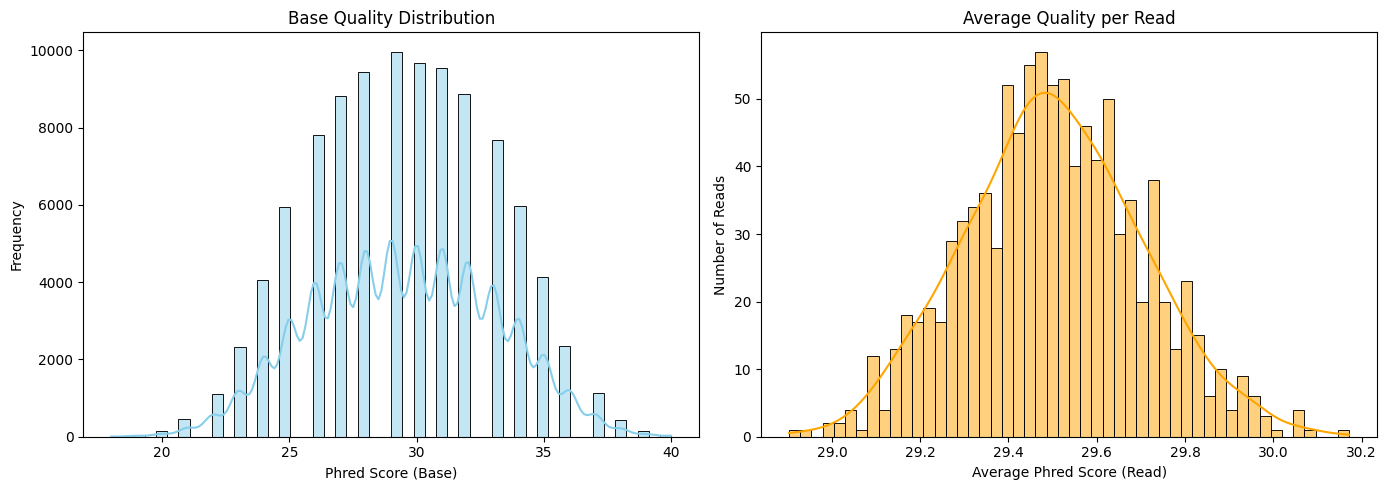


🔍 تحلیل کیفیت بازها (Base-level):
- تعداد کل بازها: 100045
- میانگین: 29.50
- میانه: 29.00
- انحراف معیار: 3.55

🔍 تحلیل کیفیت سکانس‌ها (Read-level):
- تعداد کل سکانس‌ها: 1000
- میانگین: 29.50
- میانه: 29.50
- انحراف معیار: 0.20

⚠️ درصد سکانس‌های با کیفیت پایین (میانگین < 20): 0.00%

📌 تفسیر:
☑️ کیفیت بازها قابل قبول است، ولی ممکن است در برخی موقعیت‌ها کاهش داشته باشد.
✅ درصد سکانس‌های کم‌کیفیت کمتر از ۵٪ است، نشان‌دهنده یک فایل تمیز و قابل اعتماد.


In [5]:


def read_fastq(file_path):
    return list(SeqIO.parse(file_path, "fastq"))


def compare_and_analyze_quality(reads):
    base_scores = []
    read_avg_scores = []

    for record in reads:
        scores = record.letter_annotations["phred_quality"]
        base_scores.extend(scores)
        avg = sum(scores) / len(scores)
        read_avg_scores.append(avg)

   
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(base_scores, bins=50, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title("Base Quality Distribution")
    axes[0].set_xlabel("Phred Score (Base)")
    axes[0].set_ylabel("Frequency")

    sns.histplot(read_avg_scores, bins=50, kde=True, ax=axes[1], color='orange')
    axes[1].set_title("Average Quality per Read")
    axes[1].set_xlabel("Average Phred Score (Read)")
    axes[1].set_ylabel("Number of Reads")

    plt.tight_layout()
    plt.show()

  
    print("\n🔍 تحلیل کیفیت بازها (Base-level):")
    base_mean = stats.mean(base_scores)
    base_median = stats.median(base_scores)
    base_std = stats.stdev(base_scores)

    print(f"- تعداد کل بازها: {len(base_scores)}")
    print(f"- میانگین: {base_mean:.2f}")
    print(f"- میانه: {base_median:.2f}")
    print(f"- انحراف معیار: {base_std:.2f}")

    print("\n🔍 تحلیل کیفیت سکانس‌ها (Read-level):")
    read_mean = stats.mean(read_avg_scores)
    read_median = stats.median(read_avg_scores)
    read_std = stats.stdev(read_avg_scores)

    print(f"- تعداد کل سکانس‌ها: {len(read_avg_scores)}")
    print(f"- میانگین: {read_mean:.2f}")
    print(f"- میانه: {read_median:.2f}")
    print(f"- انحراف معیار: {read_std:.2f}")

    
    low_quality_reads = [score for score in read_avg_scores if score < 20]
    percent_low = len(low_quality_reads) * 100 / len(read_avg_scores)
    print(f"\n⚠️ درصد سکانس‌های با کیفیت پایین (میانگین < 20): {percent_low:.2f}%")


    print("\n📌 تفسیر:")
    if base_mean >= 30:
        print("✅ کیفیت بازها بسیار خوب است (میانگین Phred ≥ 30). داده‌ها برای تحلیل‌های بعدی مناسب هستند.")
    elif base_mean >= 25:
        print("☑️ کیفیت بازها قابل قبول است، ولی ممکن است در برخی موقعیت‌ها کاهش داشته باشد.")
    else:
        print("⚠️ کیفیت بازها پایین است و توصیه می‌شود بازبینی انجام شود یا از ابزارهای trimming استفاده شود.")

    if percent_low < 5:
        print("✅ درصد سکانس‌های کم‌کیفیت کمتر از ۵٪ است، نشان‌دهنده یک فایل تمیز و قابل اعتماد.")
    elif percent_low < 15:
        print("☑️ درصد متوسطی از سکانس‌ها کیفیت پایین دارند، بررسی trimming توصیه می‌شود.")
    else:
        print("⚠️ تعداد زیادی از سکانس‌ها کیفیت پایین دارند. بهتر است فیلترگذاری یا QC مجدد انجام شود.")


compare_and_analyze_quality(reads)


GC Content Calculation

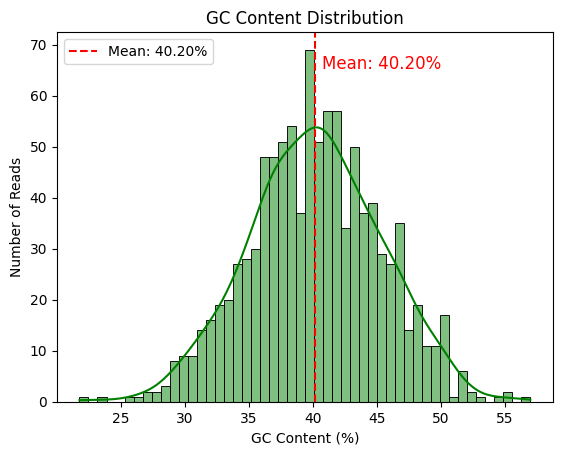


🔍 تحلیل GC Content:
- میانگین GC Content: 40.20%
- انحراف معیار GC Content: 5.15%
- درصد سکانس‌های با GC Content کمتر از ۳۰٪: 2.30%
- درصد سکانس‌های با GC Content بیشتر از ۷۰٪: 0.00%

📌 تفسیر:
✅ میانگین GC Content در بازه نرمال (40-60٪) قرار دارد که نشان‌دهنده کیفیت مناسب داده‌هاست.
✅ انحراف معیار پایین است، یعنی توزیع GC بین سکانس‌ها یکنواخت است.


In [6]:

def calculate_gc_content(reads):
    gc_contents = []
    
    for record in reads:
        seq = record.seq.upper()
        gc_count = seq.count("G") + seq.count("C")
        gc_contents.append(100 * gc_count / len(seq))
    
    mean_gc = stats.mean(gc_contents)
    stdev_gc = stats.stdev(gc_contents)

    sns.histplot(gc_contents, bins=50, kde=True, color='green')
    plt.title("GC Content Distribution")
    plt.xlabel("GC Content (%)")
    plt.ylabel("Number of Reads")

    plt.axvline(mean_gc, color='red', linestyle='--', label=f'Mean: {mean_gc:.2f}%')
    
    plt.text(mean_gc + 0.5, max(plt.ylim()) * 0.9, f'Mean: {mean_gc:.2f}%', color='red', fontsize=12)

    plt.legend()
    plt.show()

    print(f"\n🔍 تحلیل GC Content:")
    print(f"- میانگین GC Content: {mean_gc:.2f}%")
    print(f"- انحراف معیار GC Content: {stdev_gc:.2f}%")

    low_gc_count = len([gc for gc in gc_contents if gc < 30])
    high_gc_count = len([gc for gc in gc_contents if gc > 70])
    
    total_reads = len(gc_contents)
    low_gc_percent = (low_gc_count / total_reads) * 100
    high_gc_percent = (high_gc_count / total_reads) * 100

    print(f"- درصد سکانس‌های با GC Content کمتر از ۳۰٪: {low_gc_percent:.2f}%")
    print(f"- درصد سکانس‌های با GC Content بیشتر از ۷۰٪: {high_gc_percent:.2f}%")

    print("\n📌 تفسیر:")
    if 40 <= mean_gc <= 60:
        print("✅ میانگین GC Content در بازه نرمال (40-60٪) قرار دارد که نشان‌دهنده کیفیت مناسب داده‌هاست.")
    else:
        print("⚠️ میانگین GC Content خارج از بازه نرمال است و ممکن است نشانه آلودگی یا خطا در فرایند توالی‌یابی باشد.")
    
    if low_gc_percent > 5:
        print("⚠️ درصد قابل توجهی از سکانس‌ها GC پایین (<30٪) دارند که می‌تواند نشان‌دهنده وجود مناطق با AT بالا باشد.")
    
    if high_gc_percent > 1:
        print("⚠️ درصدی از سکانس‌ها دارای GC بالا (>70٪) هستند که ممکن است به ساختارهای ثانویه پایدار منجر شود یا نشان‌دهنده آلودگی باشد.")
    
    if stdev_gc > 10:
        print("⚠️ پراکندگی زیاد در مقادیر GC (انحراف معیار بالا) ممکن است کیفیت داده را کاهش دهد.")
    else:
        print("✅ انحراف معیار پایین است، یعنی توزیع GC بین سکانس‌ها یکنواخت است.")

calculate_gc_content(reads)


Quality Per Base Position

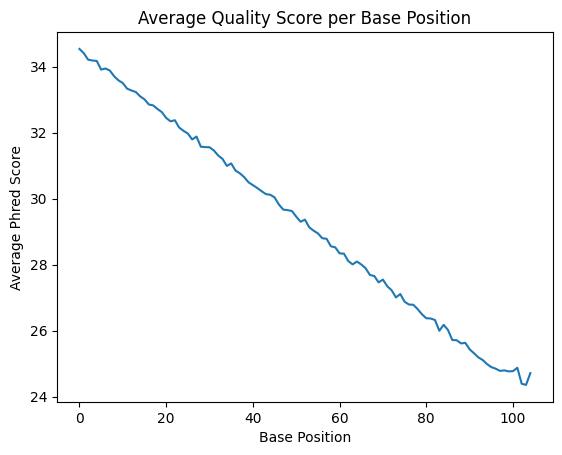


🔍 تحلیل کیفیت بازها:
- میانگین امتیاز کیفیت کلی: 29.27
- انحراف معیار امتیاز کیفیت کلی: 3.02
🔽 کیفیت در انتهای سکانس‌ها کاهش یافته است.


In [7]:

def quality_per_position(reads):
    max_len = max(len(record) for record in reads)
    pos_scores = [[] for _ in range(max_len)]

    for record in reads:
        for i, score in enumerate(record.letter_annotations["phred_quality"]):
            pos_scores[i].append(score)
    
    avg_scores = [np.mean(scores) if scores else 0 for scores in pos_scores]
    
    stdev_scores = [np.std(scores) if scores else 0 for scores in pos_scores]

    mean_quality = np.mean(avg_scores)
    stdev_quality = np.std(avg_scores)

    plt.plot(avg_scores, label="Average Quality Score")
    plt.title("Average Quality Score per Base Position")
    plt.xlabel("Base Position")
    plt.ylabel("Average Phred Score")
    plt.show()

    print(f"\n🔍 تحلیل کیفیت بازها:")
    print(f"- میانگین امتیاز کیفیت کلی: {mean_quality:.2f}")
    print(f"- انحراف معیار امتیاز کیفیت کلی: {stdev_quality:.2f}")
    
    if avg_scores[0] < mean_quality:
        print("🔽 کیفیت در ابتدای سکانس‌ها کاهش یافته است.")
    if avg_scores[-1] < mean_quality:
        print("🔽 کیفیت در انتهای سکانس‌ها کاهش یافته است.")
    
    

quality_per_position(reads)


Detect Duplicate Reads

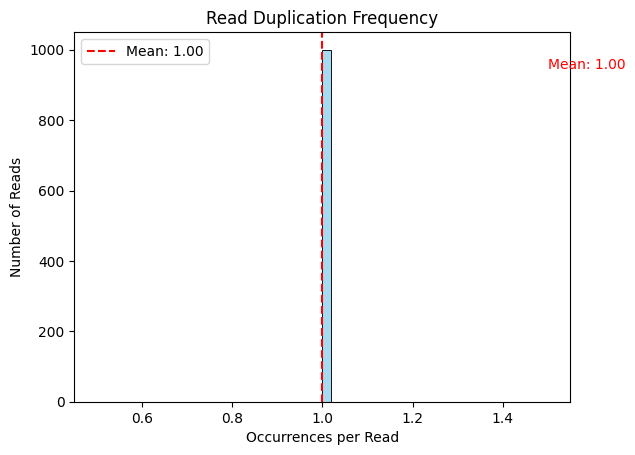

🔍 تحلیل ریدهای تکراری:
- تعداد کل ریدها: 1000
- تعداد ریدهای یکتا: 1000
- تعداد ریدهای تکراری: 0
- میانگین تعداد تکرار هر رید: 1.00
- انحراف معیار تکرار: 0.00
📌 تفسیر: میزان تکرار پایین است و احتمالاً تأثیر منفی روی آنالیز نهایی نخواهد داشت.


In [8]:


def detect_duplicates(reads):
    sequences = [str(record.seq) for record in reads]
    counts = Counter(sequences)
    duplicates = [seq for seq, count in counts.items() if count > 1]

    total_reads = len(reads)
    unique_reads = len(counts)
    duplicate_reads = len(duplicates)
    duplication_counts = list(counts.values())
    mean_duplication = stats.mean(duplication_counts)
    stdev_duplication = stats.stdev(duplication_counts)


    sns.histplot(duplication_counts, bins=50, color='skyblue')
    plt.axvline(mean_duplication, color='red', linestyle='--', label=f'Mean: {mean_duplication:.2f}')
    plt.text(mean_duplication + 0.5, max(plt.ylim()) * 0.9, f'Mean: {mean_duplication:.2f}', color='red')
    plt.title("Read Duplication Frequency")
    plt.xlabel("Occurrences per Read")
    plt.ylabel("Number of Reads")
    plt.legend()
    plt.show()

    print(f"🔍 تحلیل ریدهای تکراری:")
    print(f"- تعداد کل ریدها: {total_reads}")
    print(f"- تعداد ریدهای یکتا: {unique_reads}")
    print(f"- تعداد ریدهای تکراری: {duplicate_reads}")
    print(f"- میانگین تعداد تکرار هر رید: {mean_duplication:.2f}")
    print(f"- انحراف معیار تکرار: {stdev_duplication:.2f}")

   

    if mean_duplication > 1.5:
        print("📌 تفسیر: داده‌ها میزان قابل توجهی از ریدهای تکراری را نشان می‌دهند. بسته به نوع آنالیز نهایی، ممکن است لازم باشد ریدهای تکراری حذف شوند.")
    else:
        print("📌 تفسیر: میزان تکرار پایین است و احتمالاً تأثیر منفی روی آنالیز نهایی نخواهد داشت.")

detect_duplicates(reads)



 Read Length Distribution


🔍 تحلیل طول ریدها:
- میانگین طول ریدها: 100.05 باز
- میانه طول: 100.00 باز
- انحراف معیار: 3.14
- درصد ریدهای کوتاه‌تر از ۵۰ باز: 0.00%
- درصد ریدهای بلندتر از ۲۵۰ باز: 0.00%


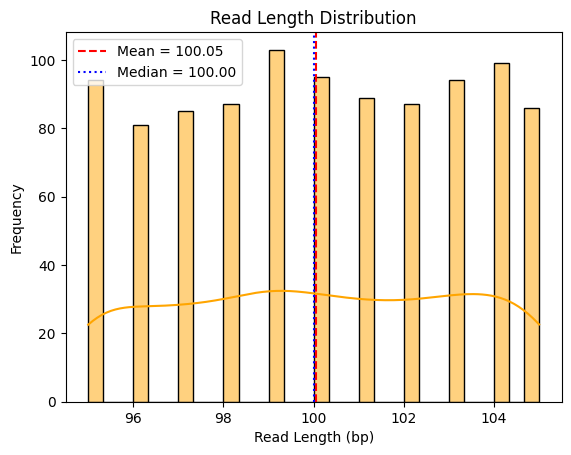


📌 تفسیر:
✅ اکثر ریدها طول مناسبی دارند.


In [9]:


def read_length_distribution(reads):
    lengths = [len(record.seq) for record in reads]
    
    mean_length = np.mean(lengths)
    median_length = np.median(lengths)
    stdev_length = np.std(lengths)

    print(f"\n🔍 تحلیل طول ریدها:")
    print(f"- میانگین طول ریدها: {mean_length:.2f} باز")
    print(f"- میانه طول: {median_length:.2f} باز")
    print(f"- انحراف معیار: {stdev_length:.2f}")

    short_reads = [l for l in lengths if l < 50]
    long_reads = [l for l in lengths if l > 250]
    percent_short = len(short_reads) * 100 / len(lengths)
    percent_long = len(long_reads) * 100 / len(lengths)

    print(f"- درصد ریدهای کوتاه‌تر از ۵۰ باز: {percent_short:.2f}%")
    print(f"- درصد ریدهای بلندتر از ۲۵۰ باز: {percent_long:.2f}%")

    sns.histplot(lengths, bins=30, kde=True, color='orange')
    plt.title("Read Length Distribution")
    plt.xlabel("Read Length (bp)")
    plt.ylabel("Frequency")

    plt.axvline(mean_length, color='red', linestyle='--', label=f'Mean = {mean_length:.2f}')
    plt.axvline(median_length, color='blue', linestyle=':', label=f'Median = {median_length:.2f}')
    plt.legend()
    plt.show()

    print("\n📌 تفسیر:")
    if percent_short > 10:
        print("⚠️ تعداد قابل‌توجهی از ریدها کوتاه هستند. این ممکن است نشان‌دهنده تخریب RNA یا مشکلات در مرحله‌ی library preparation باشد.")
    else:
        print("✅ اکثر ریدها طول مناسبی دارند.")

    if percent_long > 10:
        print("☑️ درصدی از ریدها بسیار بلند هستند. بررسی کیفیت این ریدها و trimming ممکن است مفید باشد.")

read_length_distribution(reads)
